# CS724A: Assignment 3

Name: Amit Kumar Singh

Roll no: 190117

# Question 1: Spectrogram of Audio File

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [3]:
import soundfile as sf
ts, sample_rate = sf.read('/content/myname.wav')
Audio(ts, rate=sample_rate)

The total time series length = 1.1978333333333333 sec (N points = 57496) 


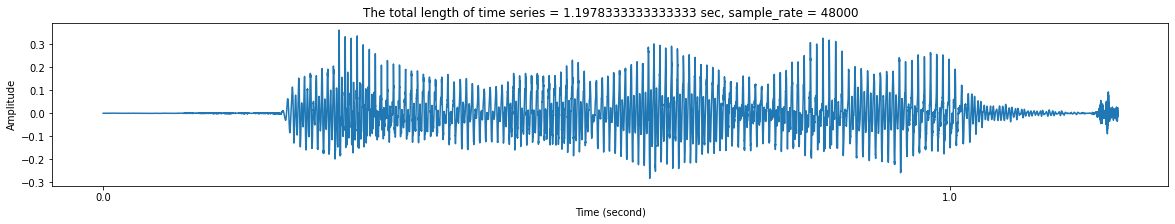

In [4]:
total_ts_sec = len(ts)/sample_rate
print("The total time series length = {} sec (N points = {}) ".format(total_ts_sec, len(ts)))
plt.figure(figsize=(20,3))
plt.plot(ts)
plt.xticks(np.arange(0,len(ts),sample_rate),
           np.arange(0,len(ts)/sample_rate,1))
plt.ylabel("Amplitude")
plt.xlabel("Time (second)")
plt.title("The total length of time series = {} sec, sample_rate = {}".format(len(ts)/sample_rate, sample_rate))
plt.show()

In [5]:
def get_xn(Xs,n):
    L  = len(Xs)
    ks = np.arange(0,L,1)
    xn = np.sum(Xs*np.exp((1j*2*np.pi*ks*n)/L))/L
    return(xn)

def get_xns(ts):
    mag = []
    L = len(ts)
    for n in range(int(L/2)):
        mag.append(np.abs(get_xn(ts,n))*2)
    return(mag)
mag = get_xns(ts)

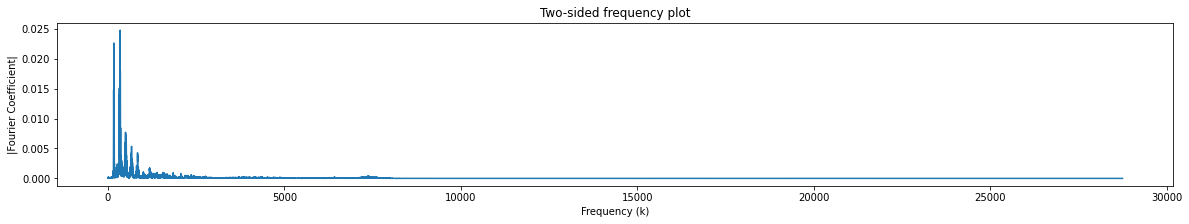

In [6]:
Nxlim = 10

plt.figure(figsize=(20,3))
plt.plot(mag)
plt.xlabel("Frequency (k)")
plt.title("Two-sided frequency plot")
plt.ylabel("|Fourier Coefficient|")
plt.show()

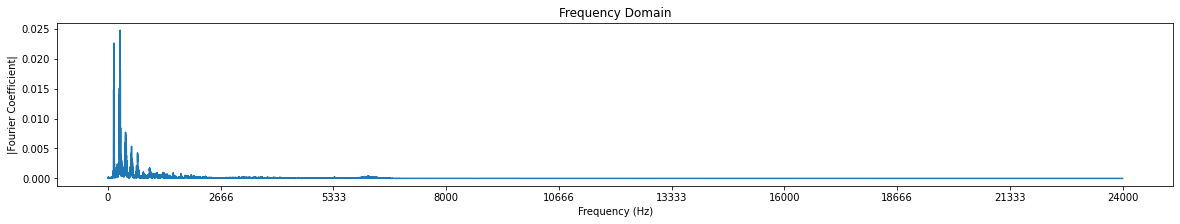

In [7]:
def get_Hz_scale_vec(ks,sample_rate,Npoints):
    freq_Hz = ks*sample_rate/Npoints
    freq_Hz  = [int(i) for i in freq_Hz ] 
    return(freq_Hz )

ks   = np.linspace(0,len(mag),Nxlim)
ksHz = get_Hz_scale_vec(ks,sample_rate,len(ts))

plt.figure(figsize=(20,3))
plt.plot(mag)
plt.xticks(ks,ksHz)
plt.title("Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|Fourier Coefficient|")
plt.show()

In [8]:
def create_spectrogram(ts,NFFT,noverlap = None):
    if noverlap is None:
        noverlap = NFFT/2
    noverlap = int(noverlap)
    starts  = np.arange(0,len(ts),NFFT-noverlap,dtype=int)
    starts  = starts[starts + NFFT < len(ts)]
    xns = []
    for start in starts:
        ts_window = get_xns(ts[start:start + NFFT]) 
        xns.append(ts_window)
    specX = np.array(xns).T
    spec = 10*np.log10(specX)
    assert spec.shape[1] == len(starts) 
    return(starts,spec)

L = 256
noverlap = 84
starts, spec = create_spectrogram(ts,L,noverlap = noverlap )

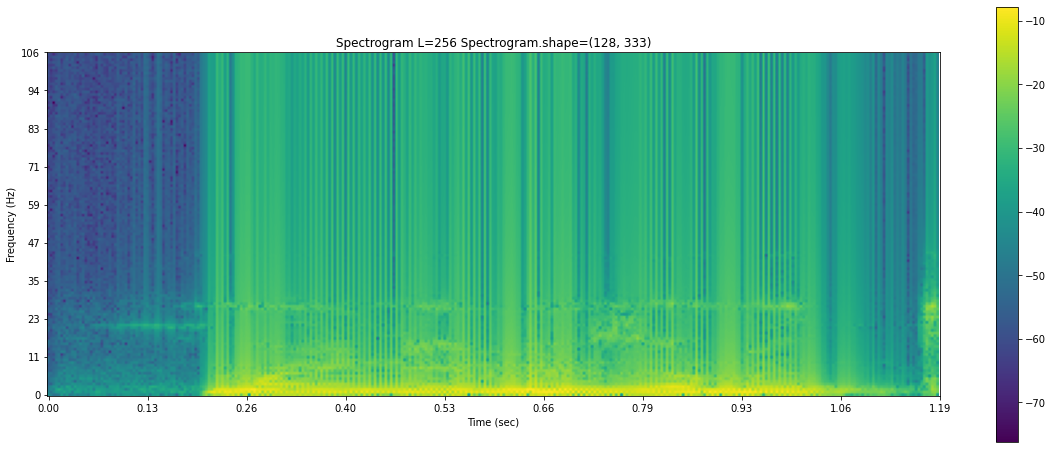

In [9]:
def plot_spectrogram(spec,ks,sample_rate, L, starts, mappable = None):
    plt.figure(figsize=(20,8))
    plt_spec = plt.imshow(spec,origin='lower')

    Nyticks = 10
    ks      = np.linspace(0,spec.shape[0],Nyticks)
    ksHz    = get_Hz_scale_vec(ks,sample_rate,len(ts))
    plt.yticks(ks,ksHz)
    plt.ylabel("Frequency (Hz)")

    Nxticks = 10
    ts_spec = np.linspace(0,spec.shape[1],Nxticks)
    ts_spec_sec  = ["{:4.2f}".format(i) for i in np.linspace(0,total_ts_sec*starts[-1]/len(ts),Nxticks)]
    plt.xticks(ts_spec,ts_spec_sec)
    plt.xlabel("Time (sec)")

    plt.title("Spectrogram L={} Spectrogram.shape={}".format(L,spec.shape))
    plt.colorbar(mappable,use_gridspec=True)
    plt.show()
    return(plt_spec)
plot_spectrogram(spec,ks,sample_rate,L, starts)